In [1]:
import pickle
from pathlib import Path
import xarray as xr

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

import pandas as pd

In [74]:
American_NLD_1984_2016=pd.read_csv("/home/esthapit/Machine_Learning/NLDAS_Clips/All_Files/American_NLD_1984_2016.csv")
Tuolumne_NLD_1984_2016=pd.read_csv("/home/esthapit/Machine_Learning/NLDAS_Clips/All_Files/Tuolumne_NLD_1984_2016.csv")
Merced_NLD_1984_2016=pd.read_csv("/home/esthapit/Machine_Learning/NLDAS_Clips/All_Files/Merced_NLD_1984_2016.csv")
Feather_NLD_1984_2016=pd.read_csv("/home/esthapit/Machine_Learning/NLDAS_Clips/All_Files/Feather_NLD_1984_2016.csv")
American_NLD_1984_2016["Date"] = pd.to_datetime(American_NLD_1984_2016["Date"])
Tuolumne_NLD_1984_2016["Date"] = pd.to_datetime(Tuolumne_NLD_1984_2016["Date"])
Merced_NLD_1984_2016["Date"] = pd.to_datetime(Merced_NLD_1984_2016["Date"])
Feather_NLD_1984_2016["Date"] = pd.to_datetime(Feather_NLD_1984_2016["Date"])
American_NLD_1984_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12054 entries, 0 to 12053
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        12054 non-null  int64         
 1   Unnamed: 0.1      12054 non-null  int64         
 2   Date              12054 non-null  datetime64[ns]
 3   TAIR(K)           12053 non-null  float64       
 4   QAIR(Kg/Kg)       12053 non-null  float64       
 5   PSURF(Pa)         12053 non-null  float64       
 6   WINDE(m/s)        12053 non-null  float64       
 7   WINDN(m/s)        12053 non-null  float64       
 8   LRAD(W/m2)        12053 non-null  float64       
 9   PRCP(mm/day)      12053 non-null  float64       
 10  PRCP_avg(mm/day)  12053 non-null  float64       
 11  SRAD(W/m2)        12053 non-null  float64       
dtypes: datetime64[ns](1), float64(9), int64(2)
memory usage: 1.1 MB


In [150]:
Tuolumne_NLD_1984_2016.loc[2465:4656,:]

,Unnamed: 0,Unnamed: 0.1,Date,Tair(K),Qair(Kg/Kg),PSurf(Pa),Wind_E(m/s),Wind_N(m/s),LWdown(W/m2),PRCP_tot(mm/day),PRCP_avg(mm/day),SWdown(W/m2)
2465,273,273,1990-10-01,288.86578,0.004202,82222.234,0.192440,0.192440,267.09366,0.000000,0.000000,218.56737
2466,274,274,1990-10-02,288.07928,0.004886,81863.805,2.270952,2.270952,270.60837,0.000000,0.000000,216.82349
2467,275,275,1990-10-03,287.67685,0.004085,81977.016,0.001384,0.001384,265.77438,0.000000,0.000000,216.44095
2468,276,276,1990-10-04,289.24478,0.004289,82390.980,0.537173,0.537173,271.27505,0.000000,0.000000,212.47632
2469,277,277,1990-10-05,287.58228,0.005993,82193.570,2.320730,2.320730,283.29780,0.000000,0.000000,194.92885
...,...,...,...,...,...,...,...,...,...,...,...,...
4652,269,269,1996-09-26,286.83685,0.004300,81893.695,0.879568,0.879568,269.37070,0.536629,0.022360,228.24110
4653,270,270,1996-09-27,287.08243,0.004006,82072.984,-0.944673,-0.944673,260.54608,0.461350,0.019223,227.29297
4654,271,271,1996-09-28,288.20865,0.004340,82405.836,-0.900030,-0.900030,265.92700,0.138329,0.005764,225.01938
4655,272,272,1996-09-29,288.95140,0.004554,82195.555,-0.677485,-0.677485,268.56387,0.000000,0.000000,222.70341


In [75]:
American_NLD_1991_1996=American_NLD_1984_2016.loc[2465:4656,"PRCP(mm/day)"]
American_NLD_1991_1996=pd.DataFrame(data=American_NLD_1991_1996)
American_NLD_1991_1996["Date"]=American_NLD_1984_2016.loc[2465:4656,"Date"]
American_NLD_1991_1996["Cum_Sum"] = "0"
American_NLD_1991_1996=American_NLD_1991_1996.reset_index()
American_NLD_1991_1996.drop("index",inplace=True,axis=1)
American_NLD_1991_1996

Merced_NLD_1991_1996=Merced_NLD_1984_2016.loc[2465:4656,"PRCP(mm/day)"]
Merced_NLD_1991_1996=pd.DataFrame(data=Merced_NLD_1991_1996)
Merced_NLD_1991_1996["Date"]=Merced_NLD_1984_2016.loc[2465:4656,"Date"]
Merced_NLD_1991_1996["Cum_Sum"] = "0"
Merced_NLD_1991_1996=Merced_NLD_1991_1996.reset_index()
Merced_NLD_1991_1996.drop("index",inplace=True,axis=1)

Tuolumne_NLD_1991_1996=Tuolumne_NLD_1984_2016.loc[2465:4656,"PRCP_tot(mm/day)"]
Tuolumne_NLD_1991_1996=pd.DataFrame(data=Tuolumne_NLD_1991_1996)
Tuolumne_NLD_1991_1996["Date"]=Tuolumne_NLD_1984_2016.loc[2465:4656,"Date"]
Tuolumne_NLD_1991_1996["Cum_Sum"] = "0"
Tuolumne_NLD_1991_1996=Tuolumne_NLD_1991_1996.reset_index()
Tuolumne_NLD_1991_1996.drop("index",inplace=True,axis=1)

Feather_NLD_1991_1996=Feather_NLD_1984_2016.loc[2465:4656,"PRCP(mm/day)"]
Feather_NLD_1991_1996=pd.DataFrame(data=Feather_NLD_1991_1996)
Feather_NLD_1991_1996["Date"]=Feather_NLD_1984_2016.loc[2465:4656,"Date"]
Feather_NLD_1991_1996["Cum_Sum"] = "0"
Feather_NLD_1991_1996=Feather_NLD_1991_1996.reset_index()
Feather_NLD_1991_1996.drop("index",inplace=True,axis=1)

In [134]:
American_NLD_1991_1996.loc[1826:2190,:]

,PRCP(mm/day),Date,Cum_Sum
1826,0.000000,1995-10-01,0
1827,0.000000,1995-10-02,0
1828,0.000000,1995-10-03,0
1829,0.000000,1995-10-04,0
1830,0.000000,1995-10-05,0
...,...,...,...
2186,0.051312,1996-09-25,0
2187,0.126738,1996-09-26,0
2188,0.000025,1996-09-27,0
2189,0.000000,1996-09-28,0


In [76]:
American_NLD_1991_1996.loc[1:364,"Cum_Sum"]=American_NLD_1991_1996.loc[1:364,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[365:730,"Cum_Sum"]=American_NLD_1991_1996.loc[365:730,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[731:1095,"Cum_Sum"]=American_NLD_1991_1996.loc[731:1095,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[1096:1460,"Cum_Sum"]=American_NLD_1991_1996.loc[1096:1460,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[1461:1825,"Cum_Sum"]=American_NLD_1991_1996.loc[1461:1825,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[1826:2191,"Cum_Sum"]=American_NLD_1991_1996.loc[1826:2191,"PRCP(mm/day)"].cumsum()
American_NLD_1991_1996.loc[1826:2191]

Merced_NLD_1991_1996.loc[1:364,"Cum_Sum"]=Merced_NLD_1991_1996.loc[1:364,"PRCP(mm/day)"].cumsum()
Merced_NLD_1991_1996.loc[365:730,"Cum_Sum"]=Merced_NLD_1991_1996.loc[365:730,"PRCP(mm/day)"].cumsum()
Merced_NLD_1991_1996.loc[731:1095,"Cum_Sum"]=Merced_NLD_1991_1996.loc[731:1095,"PRCP(mm/day)"].cumsum()
Merced_NLD_1991_1996.loc[1096:1460,"Cum_Sum"]=Merced_NLD_1991_1996.loc[1096:1460,"PRCP(mm/day)"].cumsum()
Merced_NLD_1991_1996.loc[1461:1825,"Cum_Sum"]=Merced_NLD_1991_1996.loc[1461:1825,"PRCP(mm/day)"].cumsum()
Merced_NLD_1991_1996.loc[1826:2191,"Cum_Sum"]=Merced_NLD_1991_1996.loc[1826:2191,"PRCP(mm/day)"].cumsum()

Tuolumne_NLD_1991_1996.loc[1:364,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[1:364,"PRCP_tot(mm/day)"].cumsum()
Tuolumne_NLD_1991_1996.loc[365:730,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[365:730,"PRCP_tot(mm/day)"].cumsum()
Tuolumne_NLD_1991_1996.loc[731:1095,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[731:1095,"PRCP_tot(mm/day)"].cumsum()
Tuolumne_NLD_1991_1996.loc[1096:1460,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[1096:1460,"PRCP_tot(mm/day)"].cumsum()
Tuolumne_NLD_1991_1996.loc[1461:1825,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[1461:1825,"PRCP_tot(mm/day)"].cumsum()
Tuolumne_NLD_1991_1996.loc[1826:2191,"Cum_Sum"]=Tuolumne_NLD_1991_1996.loc[1826:2191,"PRCP_tot(mm/day)"].cumsum()

Feather_NLD_1991_1996.loc[1:364,"Cum_Sum"]=Feather_NLD_1991_1996.loc[1:364,"PRCP(mm/day)"].cumsum()
Feather_NLD_1991_1996.loc[365:730,"Cum_Sum"]=Feather_NLD_1991_1996.loc[365:730,"PRCP(mm/day)"].cumsum()
Feather_NLD_1991_1996.loc[731:1095,"Cum_Sum"]=Feather_NLD_1991_1996.loc[731:1095,"PRCP(mm/day)"].cumsum()
Feather_NLD_1991_1996.loc[1096:1460,"Cum_Sum"]=Feather_NLD_1991_1996.loc[1096:1460,"PRCP(mm/day)"].cumsum()
Feather_NLD_1991_1996.loc[1461:1825,"Cum_Sum"]=Feather_NLD_1991_1996.loc[1461:1825,"PRCP(mm/day)"].cumsum()
Feather_NLD_1991_1996.loc[1826:2191,"Cum_Sum"]=Feather_NLD_1991_1996.loc[1826:2191,"PRCP(mm/day)"].cumsum()

In [147]:
American_NLD_1991_1996.loc[1461:1825]

,PRCP(mm/day),Date,Cum_Sum
1461,0.005494,1994-10-01,0.005494
1462,0.210106,1994-10-02,0.2156
1463,0.329344,1994-10-03,0.544944
1464,16.480156,1994-10-04,17.0251
1465,12.129046,1994-10-05,29.154145
...,...,...,...
1821,0.000000,1995-09-26,2054.636625
1822,0.000000,1995-09-27,2054.636625
1823,0.004684,1995-09-28,2054.641309
1824,0.011494,1995-09-29,2054.652803


In [77]:
American_NLD_1991_1996=pd.concat([American_NLD_1991_1996.loc[1:364],American_NLD_1991_1996.loc[365:730],American_NLD_1991_1996.loc[731:1095],American_NLD_1991_1996.loc[1096:1460],American_NLD_1991_1996.loc[1461:1825],American_NLD_1991_1996.loc[1826:2191]])
Merced_NLD_1991_1996=pd.concat([Merced_NLD_1991_1996.loc[1:364],Merced_NLD_1991_1996.loc[365:730],Merced_NLD_1991_1996.loc[731:1095],Merced_NLD_1991_1996.loc[1096:1460],Merced_NLD_1991_1996.loc[1461:1825],Merced_NLD_1991_1996.loc[1826:2191]])
Tuolumne_NLD_1991_1996=pd.concat([Tuolumne_NLD_1991_1996.loc[1:364],Tuolumne_NLD_1991_1996.loc[365:730],Tuolumne_NLD_1991_1996.loc[731:1095],Tuolumne_NLD_1991_1996.loc[1096:1460],Tuolumne_NLD_1991_1996.loc[1461:1825],Tuolumne_NLD_1991_1996.loc[1826:2191]])
Feather_NLD_1991_1996=pd.concat([Feather_NLD_1991_1996.loc[1:364],Feather_NLD_1991_1996.loc[365:730],Feather_NLD_1991_1996.loc[731:1095],Feather_NLD_1991_1996.loc[1096:1460],Feather_NLD_1991_1996.loc[1461:1825],Feather_NLD_1991_1996.loc[1826:2191]])

Text(0.5, -0.15, '(d)')

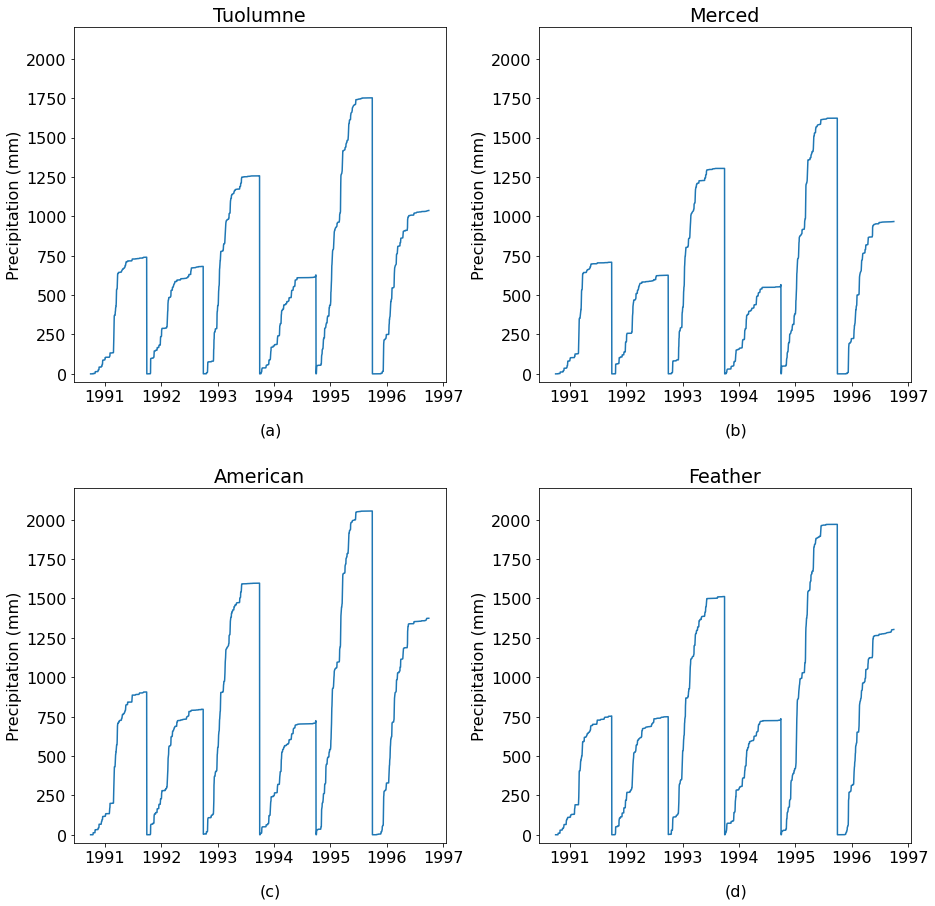

In [83]:
fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.25, hspace=0.3)

ax1 = plt.subplot(2,2,1)
x= Tuolumne_NLD_1991_1996["Date"]
y= Tuolumne_NLD_1991_1996["Cum_Sum"]
ax1.plot(x,y)
ax1.set_title("Tuolumne")
ax1.set_ylabel("Precipitation (mm)")
ax1.set_ylim(-50, 2200)
ax1.text(0.5,-0.15,"(a)",transform=ax1.transAxes, fontsize=16)

ax2 = plt.subplot(2,2,2)
x= Merced_NLD_1991_1996["Date"]
y= Merced_NLD_1991_1996["Cum_Sum"]
ax2.plot(x,y)
ax2.set_title("Merced")
ax2.set_ylabel("Precipitation (mm)")
ax2.set_ylim(-50, 2200)
ax2.text(0.5,-0.15,"(b)",transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(2,2,3)
x= American_NLD_1991_1996["Date"]
y= American_NLD_1991_1996["Cum_Sum"]
ax3.plot(x,y)
ax3.set_title("American")
ax3.set_ylabel("Precipitation (mm)")
ax3.set_ylim(-50, 2200)
ax3.text(0.5,-0.15,"(c)",transform=ax3.transAxes, fontsize=16)

ax4 = plt.subplot(2,2,4)
x= Feather_NLD_1991_1996["Date"]
y= Feather_NLD_1991_1996["Cum_Sum"]
ax4.plot(x,y)
ax4.set_title("Feather")
ax4.set_ylabel("Precipitation (mm)")
ax4.set_ylim(-50, 2200)
ax4.text(0.5,-0.15,"(d)",transform=ax4.transAxes, fontsize=16)

In [78]:
American_NLD_1991_1996.loc["Cum_Sum"].cumsum()

,PRCP(mm/day),Cum_Sum
2465,0.000000,0.000000
2466,0.080006,0.080006
2467,0.000000,0.000000
2468,0.000000,0.000000
2469,0.000000,0.000000
...,...,...
4653,0.000025,0.000025
4654,0.000000,0.000000
4655,0.000000,0.000000
4656,0.000000,0.000000


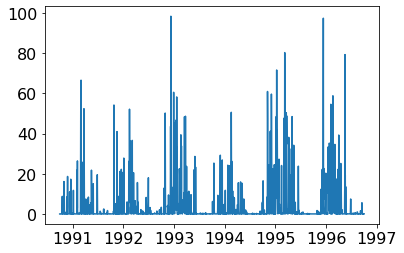

In [65]:
y=American_NLD_1991_1996.loc[2465:4657,"PRCP(mm/day)"]
x=American_NLD_1984_2016.loc[2465:4657,"Date"]
plt.plot(x,y)

In [2]:
#run_dir = Path("/glade/u/home/engelas/neuralhydrology-neuralhydrology-ab39c52/neuralhydrology/runs/test_run_0901_132200")
#run_dir1 = Path("/glade/u/home/engelas/neuralhydrology-neuralhydrology-ab39c52/neuralhydrology/runs/shed1_test_run_2502_085626")

run_dir1 = Path("/home/esthapit/Machine_Learning/LSTM_runs/60_20_20/tuolumne_test_run_0308_113434")
run_dir2 = Path("/home/esthapit/Machine_Learning/LSTM_runs/60_20_20/merced_test_run_0308_111620")
run_dir3 = Path("/home/esthapit/Machine_Learning/LSTM_runs/60_20_20/american_test_run_0308_103849")
run_dir4 = Path("/home/esthapit/Machine_Learning/LSTM_runs/60_20_20/feather_test_run_0308_120725")

In [3]:
#with open(run_dir / "test" / "model_epoch050" / "test_results.p", "rb") as fp:
#    results = pickle.load(fp)
    
#results.keys()

with open(run_dir1 / "test_results.p", "rb") as fp_Tuol:
    results_Tuol = pickle.load(fp_Tuol)  
print("Tuolumne {}".format(results_Tuol.keys()))

with open(run_dir2 / "test_results.p", "rb") as fp_Merc:
    results_Merc = pickle.load(fp_Merc)    
print("Merced {}".format(results_Merc.keys()))

with open(run_dir3 / "test_results.p", "rb") as fp_Amer:
    results_Amer = pickle.load(fp_Amer)    
print("American {}".format(results_Amer.keys()))

with open(run_dir4 / "test_results.p", "rb") as fp_Feat:
    results_Feat = pickle.load(fp_Feat)
print("Feather {}".format(results_Feat.keys()))


Tuolumne dict_keys(['11266500'])
Merced dict_keys(['11264500'])
American dict_keys(['11274500'])
Feather dict_keys(['11274630'])


In [37]:
#results_Tuol

In [4]:
results_Tuol['11266500']['1D']['xr']
#print("Test period Tuolumne NSE: {}".format(results_Tuol['11266500']['1D']['NSE']))
print(f"Tuolumne (Test period NSE - {results_Tuol['11266500']['1D']['NSE']:.2f})")

results_Merc['11264500']['1D']['xr']
print(f"Merced (Test period NSE - {results_Merc['11264500']['1D']['NSE']:.2f})")

results_Amer['11274500']['1D']['xr']
print(f"American (Test period NSE - {results_Amer['11274500']['1D']['NSE']:.2f})")

results_Feat['11274630']['1D']['xr']
print(f"Feather (Test period NSE - {results_Feat['11274630']['1D']['NSE']:.2f})")

Tuolumne (Test period NSE - 0.86)
Merced (Test period NSE - 0.96)
American (Test period NSE - 0.77)
Feather (Test period NSE - 0.78)


In [5]:
qobs_Tuol = results_Tuol['11266500']['1D']['xr']['QObs(mm/d)_obs'] #*(831030801* 10**6)/(28316846.592*86400)
qsim_Tuol = results_Tuol['11266500']['1D']['xr']['QObs(mm/d)_sim'] #*(831030801* 10**6)/(28316846.592*86400)

qobs_Merc = results_Merc['11264500']['1D']['xr']['QObs(mm/d)_obs'] #*(831030801* 10**6)/(28316846.592*86400)
qsim_Merc = results_Merc['11264500']['1D']['xr']['QObs(mm/d)_sim'] #*(831030801* 10**6)/(28316846.592*86400)

qobs_Amer = results_Amer['11274500']['1D']['xr']['QObs(mm/d)_obs'] #*(831030801* 10**6)/(28316846.592*86400)
qsim_Amer = results_Amer['11274500']['1D']['xr']['QObs(mm/d)_sim'] #*(831030801* 10**6)/(28316846.592*86400)

qobs_Feat = results_Feat['11274630']['1D']['xr']['QObs(mm/d)_obs'] #*(831030801* 10**6)/(28316846.592*86400)
qsim_Feat = results_Feat['11274630']['1D']['xr']['QObs(mm/d)_sim'] #*(831030801* 10**6)/(28316846.592*86400)


Text(0.5, -0.15, '(d)')

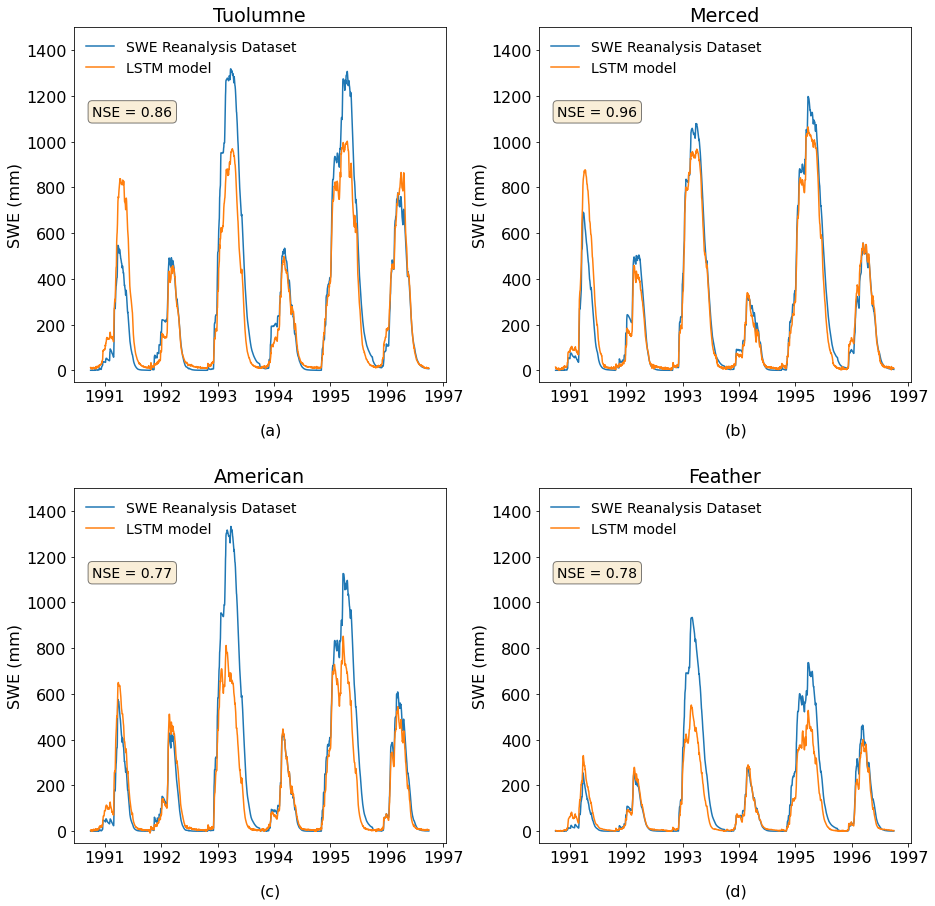

In [23]:
# extract observations and simulations

fig = plt.figure(figsize=(15,15))
fig.subplots_adjust(wspace=0.25, hspace=0.3)
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

ax1 = plt.subplot(2,2,1)
ax1.plot(qobs_Tuol['date'], qobs_Tuol)
ax1.plot(qsim_Tuol['date'], qsim_Tuol)
ax1.set_ylabel("SWE (mm)", fontsize=16)
ax1.tick_params(axis='both', labelsize=16)
ax1.legend(["SWE Reanalysis Dataset","LSTM model"], fontsize=14, frameon=False, loc='upper left')
ax1.set_title("Tuolumne")
ax1.set_ylim(-50,1500)
ax1.text(0.05,0.75,"NSE = 0.86",transform=ax1.transAxes, fontsize=14,bbox=props)
ax1.text(0.5,-0.15,"(a)",transform=ax1.transAxes, fontsize=16)

ax2 = plt.subplot(2,2,2)
ax2.plot(qobs_Merc['date'], qobs_Merc)
ax2.plot(qsim_Merc['date'], qsim_Merc)
ax2.set_ylabel("SWE (mm)", fontsize=16)
ax2.tick_params(axis='both', labelsize=16)
ax2.legend(["SWE Reanalysis Dataset","LSTM model"], fontsize=14, frameon=False, loc='upper left')
ax2.set_title("Merced")
ax2.set_ylim(-50,1500)
ax2.text(0.05,0.75,"NSE = 0.96",transform=ax2.transAxes, fontsize=14,bbox=props)
ax2.text(0.5,-0.15,"(b)",transform=ax2.transAxes, fontsize=16)

ax3 = plt.subplot(2,2,3)
ax3.plot(qobs_Amer['date'], qobs_Amer)
ax3.plot(qsim_Amer['date'], qsim_Amer)
ax3.set_ylabel("SWE (mm)", fontsize=16)
ax3.tick_params(axis='both', labelsize=16)
ax3.legend(["SWE Reanalysis Dataset","LSTM model"], fontsize=14, frameon=False, loc='upper left')
ax3.set_title("American")
ax3.set_ylim(-50,1500)
ax3.text(0.05,0.75,"NSE = 0.77",transform=ax3.transAxes, fontsize=14,bbox=props)
ax3.text(0.5,-0.15,"(c)",transform=ax3.transAxes, fontsize=16)

ax4 = plt.subplot(2,2,4)
ax4.plot(qobs_Feat['date'], qobs_Feat)
ax4.plot(qsim_Feat['date'], qsim_Feat)
ax4.set_ylabel("SWE (mm)", fontsize=16)
ax4.tick_params(axis='both', labelsize=16)
ax4.legend(["SWE Reanalysis Dataset","LSTM model"], fontsize=14, frameon=False, loc='upper left')
ax4.set_title("Feather")
ax4.set_ylim(-50,1500)
ax4.text(0.05,0.75,"NSE = 0.78",transform=ax4.transAxes, fontsize=14,bbox=props)
ax4.text(0.5,-0.15,"(d)",transform=ax4.transAxes, fontsize=16)

In [6]:
qobs_Tuol

<xarray.DataArray 'QObs(mm/d)_obs' (date: 2192, time_step: 1)>
array([[0.17999268],
       [0.1499939 ],
       [0.14300537],
       ...,
       [7.123993  ],
       [7.0059967 ],
       [7.0059967 ]], dtype=float32)
Coordinates:
  * date       (date) datetime64[ns] 1990-10-01 1990-10-02 ... 1996-09-30
  * time_step  (time_step) int64 0

In [11]:
df_qobs_Tuol = qobs_Tuol.to_dataframe(name=None, dim_order=None)
df_qobs_Merc = qobs_Merc.to_dataframe(name=None, dim_order=None)
df_qobs_Amer = qobs_Amer.to_dataframe(name=None, dim_order=None)
df_qobs_Feat = qobs_Feat.to_dataframe(name=None, dim_order=None)

df_qobs_Tuol.info()

df_qobs_Tuol.to_csv("df_qobs_Tuol.csv")
df_qobs_Merc.to_csv("df_qobs_Merc.csv")
df_qobs_Amer.to_csv("df_qobs_Amer.csv")
df_qobs_Feat.to_csv("df_qobs_Feat.csv")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2192 entries, (Timestamp('1990-10-01 00:00:00', freq='D'), 0) to (Timestamp('1996-09-30 00:00:00', freq='D'), 0)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QObs(mm/d)_obs  2192 non-null   float32
dtypes: float32(1)
memory usage: 96.9 KB


In [12]:
df_qsim_Tuol = qsim_Tuol.to_dataframe(name=None, dim_order=None)
df_qsim_Merc = qsim_Merc.to_dataframe(name=None, dim_order=None)
df_qsim_Amer = qsim_Amer.to_dataframe(name=None, dim_order=None)
df_qsim_Feat = qsim_Feat.to_dataframe(name=None, dim_order=None)

df_qsim_Tuol.info()

df_qsim_Tuol.to_csv("df_qsim_Tuol.csv")
df_qsim_Merc.to_csv("df_qsim_Merc.csv")
df_qsim_Amer.to_csv("df_qsim_Amer.csv")
df_qsim_Feat.to_csv("df_qsim_Feat.csv")

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2192 entries, (Timestamp('1990-10-01 00:00:00', freq='D'), 0) to (Timestamp('1996-09-30 00:00:00', freq='D'), 0)
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   QObs(mm/d)_sim  2192 non-null   float32
dtypes: float32(1)
memory usage: 96.9 KB


In [10]:
df_qobs_Tuol.head()

,,QObs(mm/d)_obs
date,time_step,
1990-10-01,0,0.179993
1990-10-02,0,0.149994
1990-10-03,0,0.143005
1990-10-04,0,0.137009
1990-10-05,0,0.134003


In [11]:
PBIAS_Tuol = 100*((qobs_Tuol - qsim_Tuol).sum())/(qobs_Tuol.sum())
print("PBIAS for Tuolumne: {}".format(PBIAS_Tuol))
PBIAS_Merc = 100*((qobs_Merc - qsim_Merc).sum())/(qobs_Merc.sum())
print("PBIAS for Merced: {}".format(PBIAS_Merc))
PBIAS_Amer = 100*((qobs_Amer - qsim_Amer).sum())/(qobs_Amer.sum())
print("PBIAS for American: {}".format(PBIAS_Amer))
PBIAS_Feat = 100*((qobs_Feat - qsim_Feat).sum())/(qobs_Feat.sum())
print("PBIAS for Feather: {}".format(PBIAS_Feat))

PBIAS for Tuolumne: <xarray.DataArray ()>
array(10.33739156)
PBIAS for Merced: <xarray.DataArray ()>
array(3.07847525)
PBIAS for American: <xarray.DataArray ()>
array(24.12726611)
PBIAS for Feather: <xarray.DataArray ()>
array(27.26464393)
